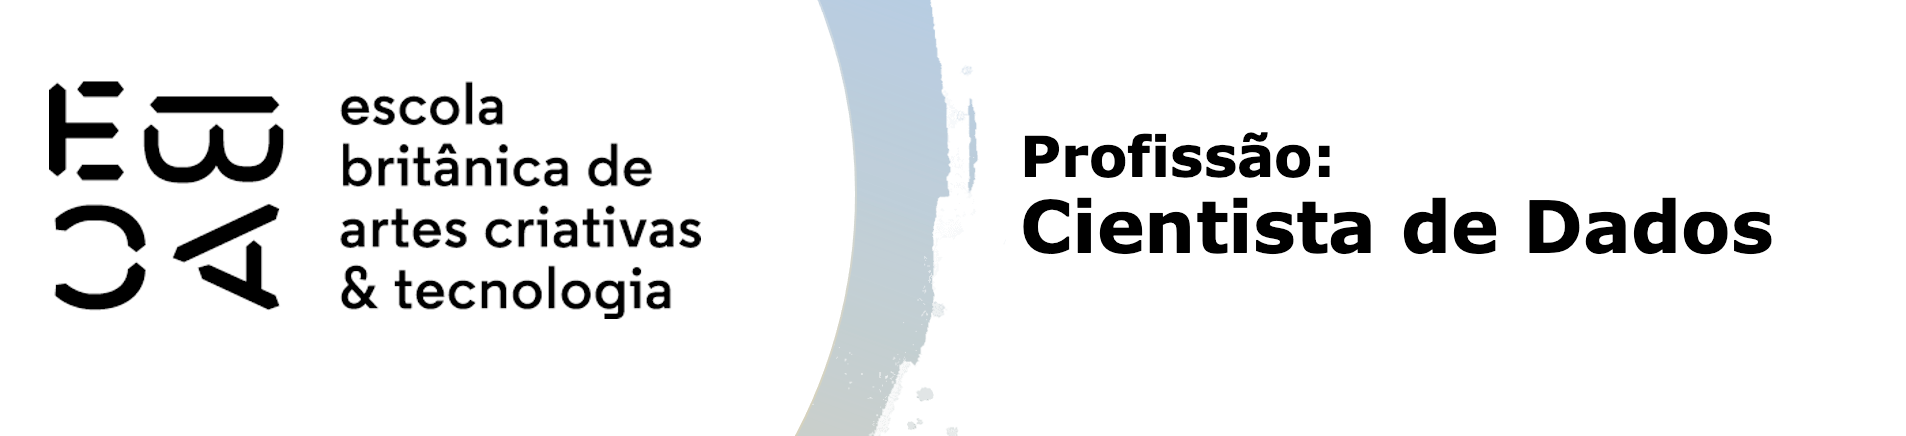

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

## Pacotes + Dataframe

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns

import matplotlib        as plt
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api         as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('./Dados/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [2]:
# Pequenas modificações no banco de dados

df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].median())
df['log_renda'] = np.log(df['renda'])
df.drop(columns=['index','renda'], inplace=True)
df['sexo'] = df['sexo'].map({'M': True, 'F': False})
df['posse_de_veiculo'] = df['posse_de_veiculo'].map({'S': True, 'N': False})
df['posse_de_imovel'] = df['posse_de_imovel'].map({'S': True, 'N': False})
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,log_renda
0,2015-01-01,True,True,False,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,9.318131
1,2015-01-01,True,True,False,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,7.793508
2,2015-01-01,True,True,False,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,9.528769
3,2015-01-01,True,False,True,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,7.767196
4,2015-01-01,False,False,True,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,6.673020


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

## Verificando Residuos

In [3]:
# Preparar os dados
X = sm.add_constant(df['idade'])  # Adiciona o intercepto (constante)
y = df['log_renda']

modelo = sm.OLS(y, X).fit()

residuos = modelo.resid

## Gráfico de resíduos vs valores preditos

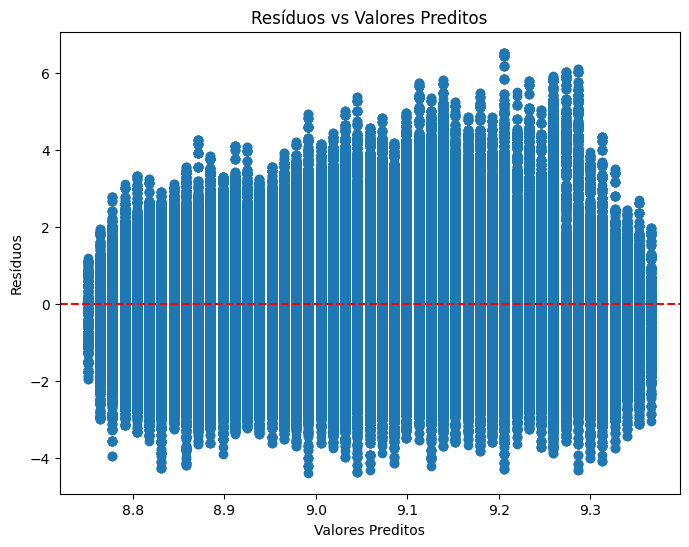

In [4]:
preditos = modelo.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(preditos, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

* O gráfico parece mostrar uma distribuição aleatória dos resíduos em torno da *linha zero*
  * Um bom sinal

## Verificando a distribuição normal dos resíduos


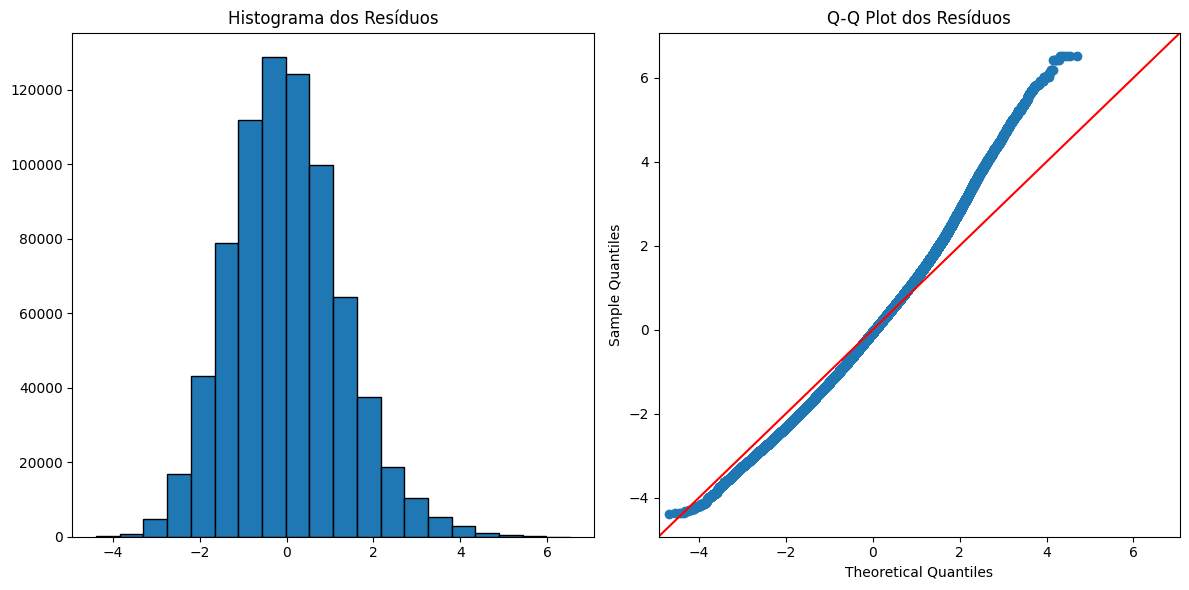

In [5]:
# Histograma
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuos, bins=20, edgecolor='black')
plt.title('Histograma dos Resíduos')

# Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuos, line='45', ax=plt.gca())
plt.title('Q-Q Plot dos Resíduos')

plt.tight_layout()
plt.show()

* Vendo os gráficos, podemos ver que os residuos estão seguindo uma distribuição normal

## Testando com as demais variáveis preditoras

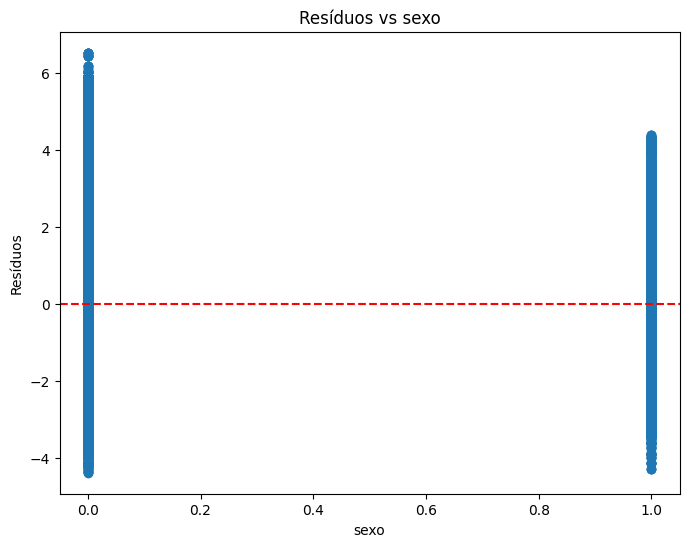

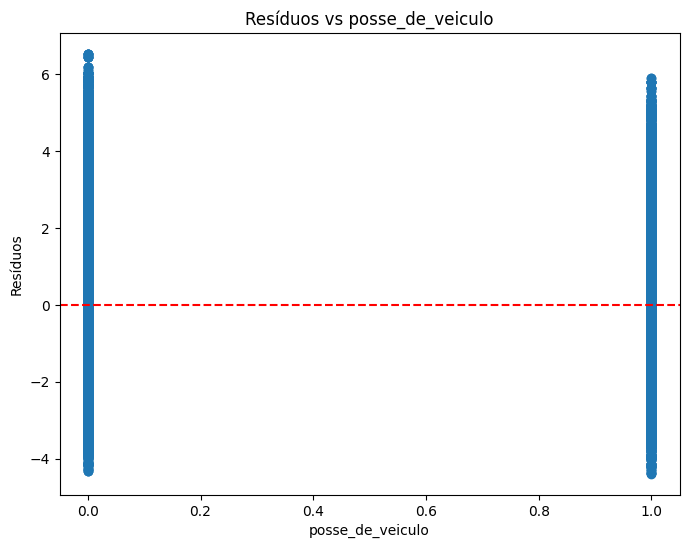

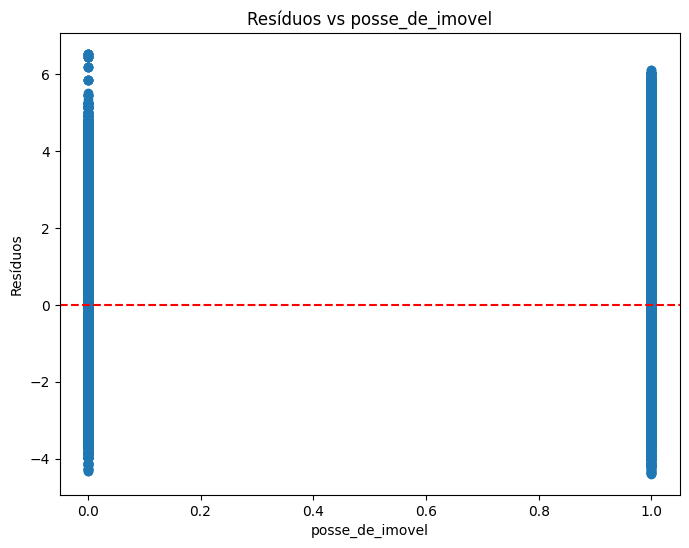

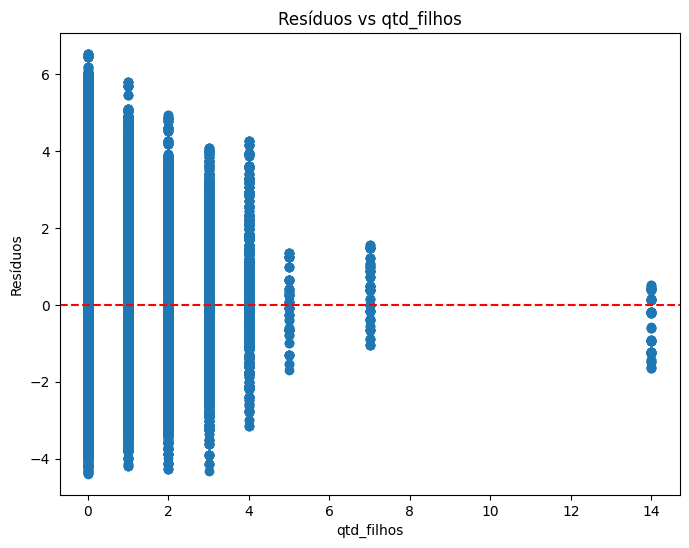

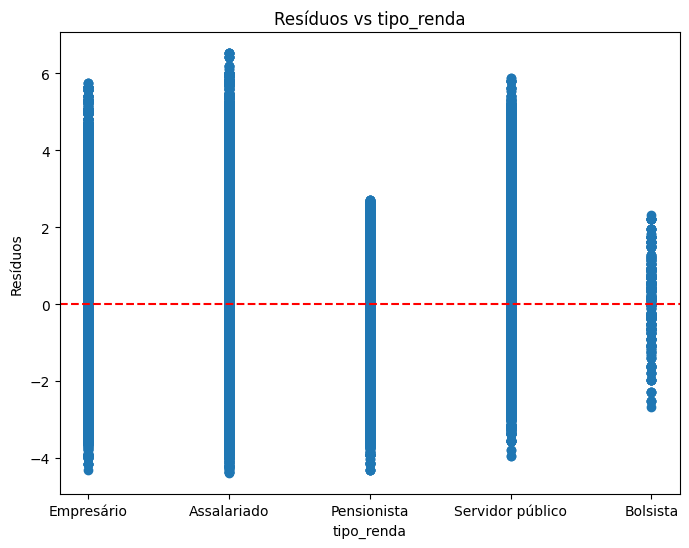

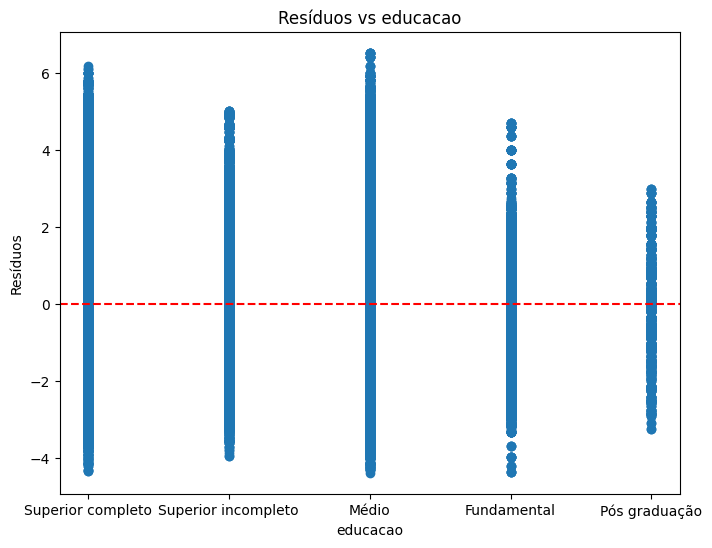

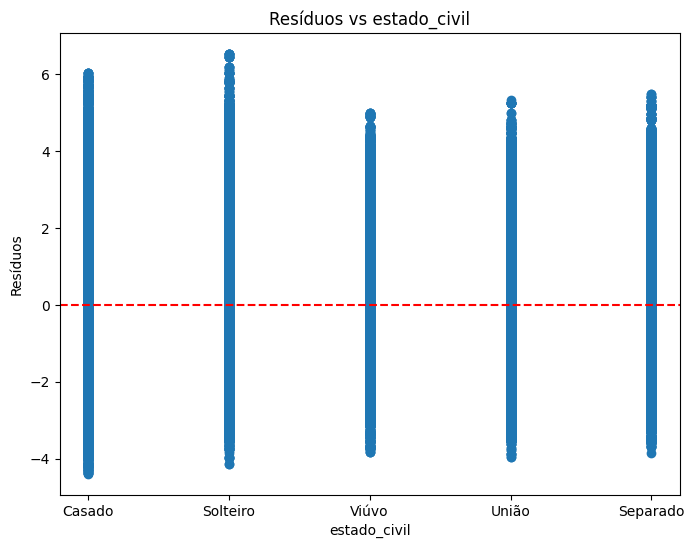

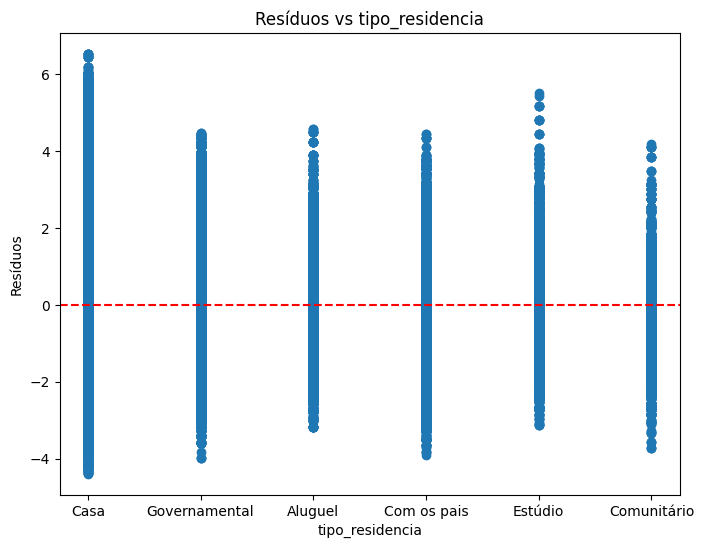

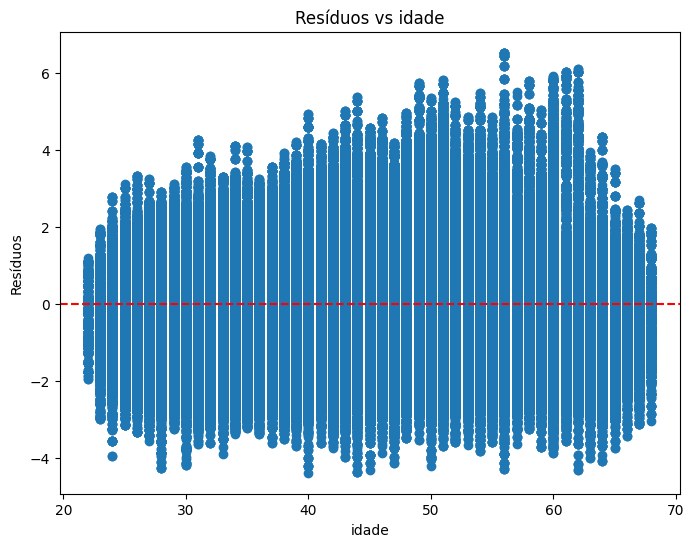

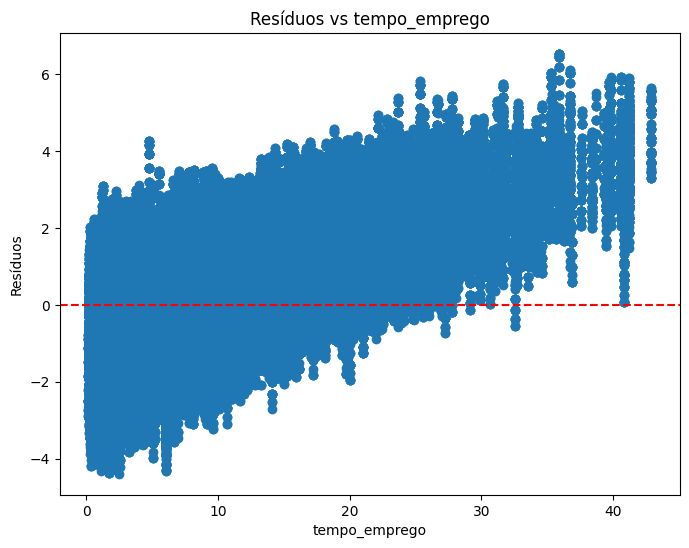

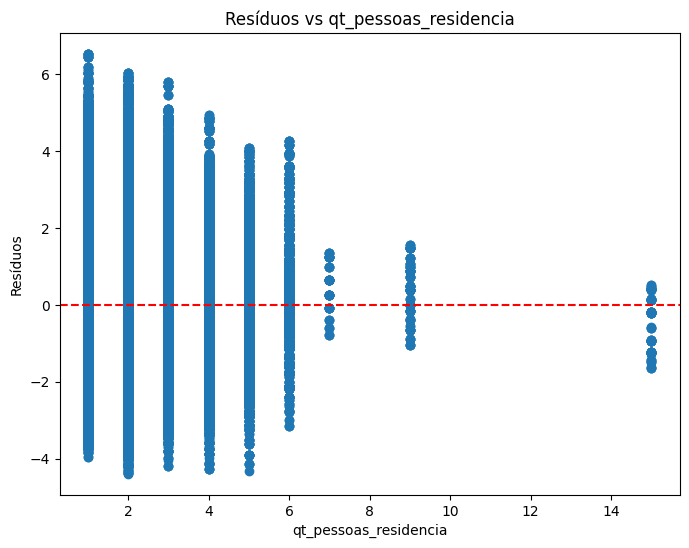

In [6]:
# Lista de variáveis preditoras
variaveis_preditoras = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']

# Gerar gráficos para cada variavel preditora
for variavel in variaveis_preditoras:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[variavel], residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Resíduos vs {variavel}')
    plt.xlabel(variavel)
    plt.ylabel('Resíduos')
    plt.show()

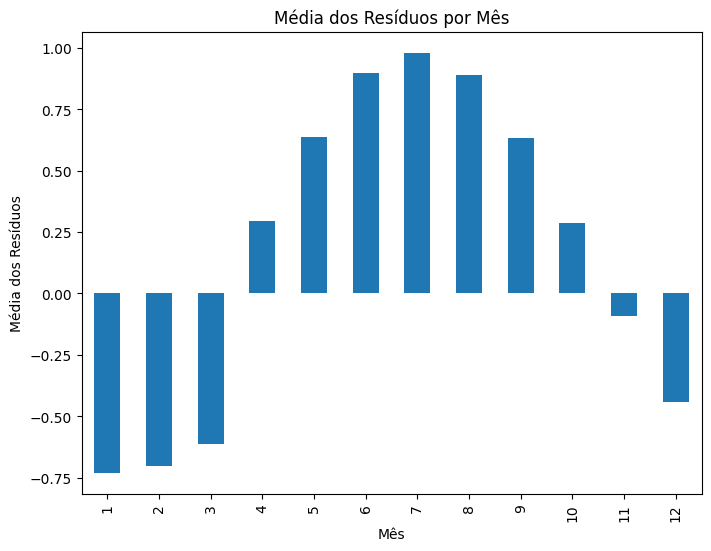

In [7]:
# Por mês
df['mes'] = pd.to_datetime(df['data_ref']).dt.month
df['residuos'] = residuos

media_residuos_mes = df.groupby('mes')['residuos'].mean()

# Plotando a média dos resíduos por mês
plt.figure(figsize=(8, 6))
media_residuos_mes.plot(kind='bar')
plt.title('Média dos Resíduos por Mês')
plt.xlabel('Mês')
plt.ylabel('Média dos Resíduos')
plt.show()


## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

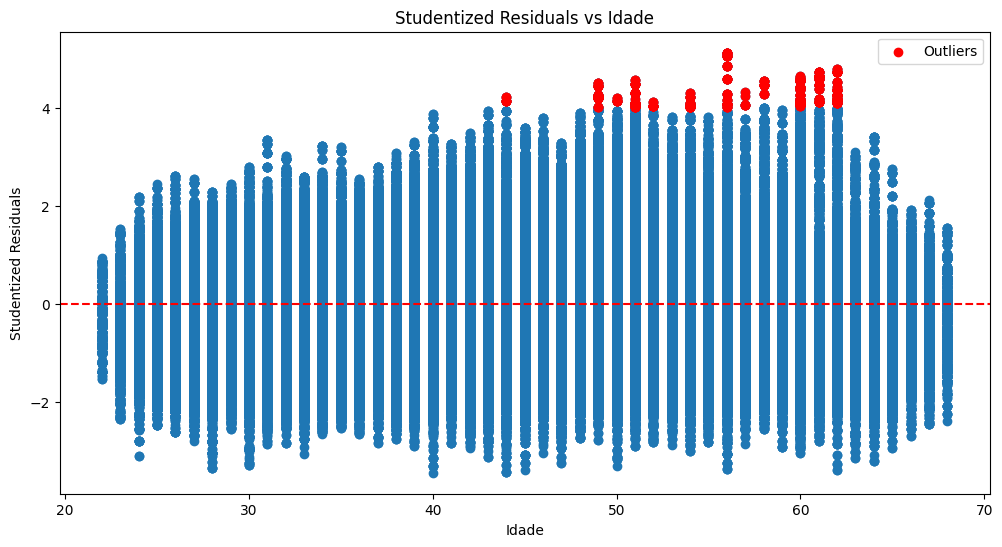

In [8]:
# Ajustar o modelo de regressão linear
X = sm.add_constant(df['idade'])  # Adiciona a constante
y = df['log_renda']
modelo = sm.OLS(y, X).fit()

# Calcular os studentized residuals
influence = modelo.get_influence()
studentized_residuals = influence.resid_studentized_internal

# Visualizar os studentized residuals
plt.figure(figsize=(12, 6))
plt.scatter(df['idade'], studentized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Studentized Residuals vs Idade')
plt.xlabel('Idade')
plt.ylabel('Studentized Residuals')

# Identificando outliers: Residuals absolutos maiores 4
outliers = np.abs(studentized_residuals) > 4
plt.scatter(df['idade'][outliers], studentized_residuals[outliers], color='red', label='Outliers')
plt.legend()



* Foi verificado alguns *Outliers* com seus *Residuals absolutos* maiores que **4**

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

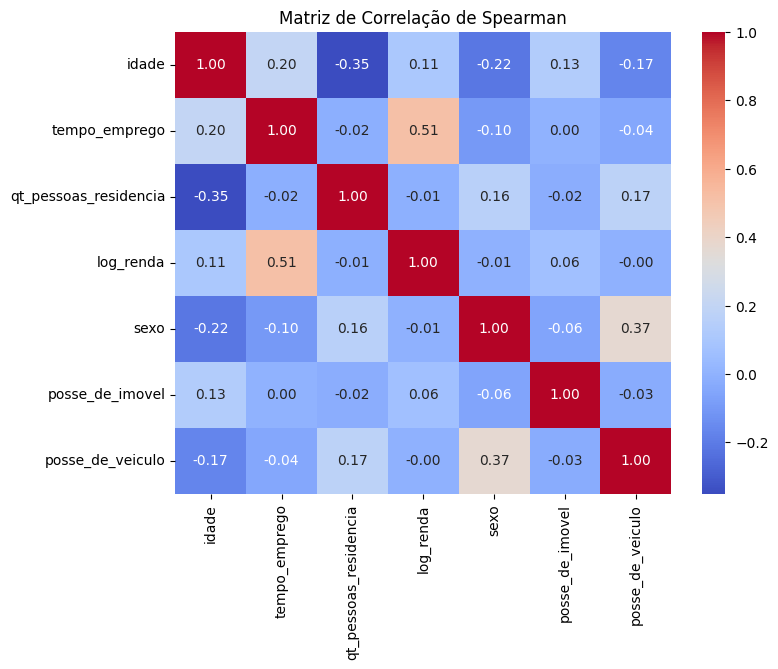

In [9]:
# Matriz de Correlação de Spearman
variaveis_numericas = df[['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda','sexo','posse_de_imovel','posse_de_veiculo']] 

# Selecionar as variáveis numéricas para a correlação
correlacao_spearman = variaveis_numericas.corr(method='spearman')

# Exibir a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Spearman')
plt.show()

* **Spearman** nos motra que a grande maioria as variaveis não possuem colinearidade, somente algumas como:
    1. **Sexo** com **Posse_de_veiculo**
    2. **Log_renda** com **tempo_emprego**

In [10]:
# VIF

df['sexo'] = df['sexo'].astype(int)
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)

# Adicionando uma constante para calcular o VIF
X = sm.add_constant(df[['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda','sexo','posse_de_imovel','posse_de_veiculo']])  # Substitua pelas suas variáveis independentes
vif_data = pd.DataFrame()
vif_data["variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir o VIF
print(vif_data)

                variável        VIF
0                  const  97.099896
1                  idade   1.228624
2          tempo_emprego   1.681864
3  qt_pessoas_residencia   1.152362
4              log_renda   1.638368
5                   sexo   1.202806
6        posse_de_imovel   1.028506
7       posse_de_veiculo   1.177121


* Fora a constante que é esperado um alto valor, o **VIF** parece bom, com números baixos demonstrando que não há colinearidade excessiva

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

* Irei retirar os *outliers* vistos anteriormente e rodar novamente **Spearman** e o **VIF**

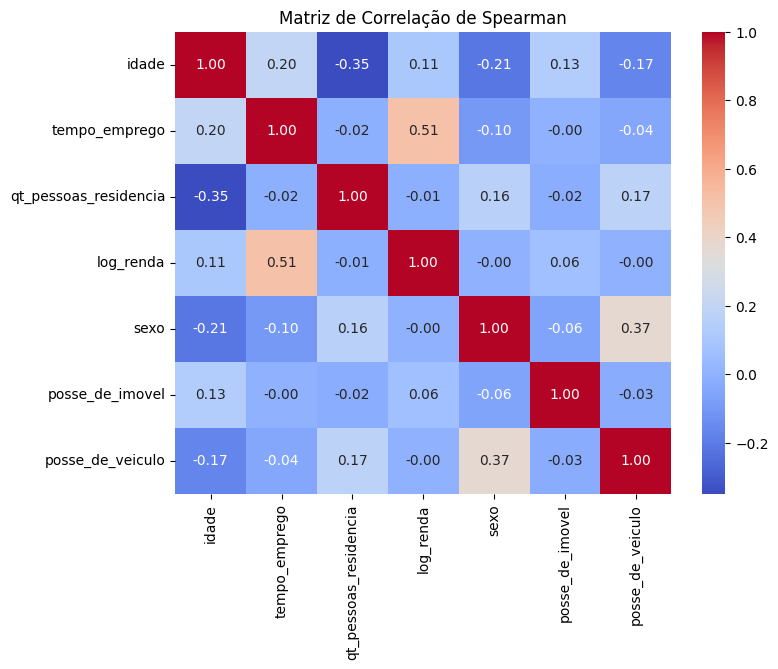

                variável        VIF
0                  const  97.257592
1                  idade   1.227818
2          tempo_emprego   1.669305
3  qt_pessoas_residencia   1.152243
4              log_renda   1.626453
5                   sexo   1.202572
6        posse_de_imovel   1.028463
7       posse_de_veiculo   1.177076 




In [11]:
df_sem_outliers = df[~outliers]

# Matriz de Correlação de Spearman
variaveis_numericas = df_sem_outliers[['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda','sexo','posse_de_imovel','posse_de_veiculo']] 
correlacao_spearman = variaveis_numericas.corr(method='spearman')

# Exibir a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Spearman')
plt.show()

# VIF
X = sm.add_constant(df_sem_outliers[['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda','sexo','posse_de_imovel','posse_de_veiculo']])  
vif_data = pd.DataFrame()
vif_data["variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir o VIF
print(vif_data,'\n\n')

* Após retirar os *outliers* foi visto uma queda na colinearidade tanto por *Spearman* quando no teste de *VIF*